In [ ]:
"""
A. Tham khảo hưỡng dẫn về GNN tại:
+ https://viblo.asia/p/gioi-thieu-ve-graph-neural-networks-gnns-yZjJYG7MVOE
+ https://docs.dgl.ai/en/0.8.x/tutorials/blitz/4_link_predict.html
+ https://arxiv.org/ftp/arxiv/papers/1812/1812.08434.pdf

B. Yêu cầu:
1. Tìm hiểu và trình bày tổng quan về GNN
2. Sử dụng GNN để dự đoán liên kết mạng xã hội mầ bạn lựa chọn
3. Đánh giá kết quả giữa GNN và các phương pháp trong LAB 04.01 / 04.02
"""

# **Graph Neural Network (GNN) và Graph Convolutional Network (GCN)**

## **1. Graph Convolutional Network (GCN)**

### **1.1. Công thức tổng quát của GCN**

Mỗi lớp \( k \) trong GCN thực hiện:
\[
\mathbf{H}^{(k)} = \sigma \left( \mathbf{\tilde{D}}^{-1/2} \mathbf{\tilde{A}} \mathbf{\tilde{D}}^{-1/2} \mathbf{H}^{(k-1)} \mathbf{W}^{(k)} \right)
\]

### **1.2. Giải thích các ký hiệu**

- \( \mathbf{\tilde{A}} = \mathbf{A} + \mathbf{I} \): Ma trận kề (adjacency matrix) có thêm cạnh tự vòng (self-loop).
- \( \mathbf{\tilde{D}} \): Ma trận bậc (degree matrix) tương ứng với \( \mathbf{\tilde{A}} \).
  \[
  \mathbf{\tilde{D}}_{ii} = \sum_{j} \mathbf{\tilde{A}}\_{ij}
  \]
- \( \mathbf{H}^{(k-1)} \): Đặc trưng đầu vào của lớp \( k-1 \).
- \( \mathbf{W}^{(k)} \): Ma trận trọng số cần học của lớp \( k \).
- \( \sigma \): Hàm kích hoạt (ReLU, Sigmoid, v.v.).

---

## **2. Các bước hoạt động của GCN**

### **2.1. Chuẩn hóa ma trận kề**

- Ma trận kề \( \mathbf{A} \) được chuẩn hóa để đảm bảo giá trị đầu ra ổn định:
  \[
  \mathbf{\hat{A}} = \mathbf{\tilde{D}}^{-1/2} \mathbf{\tilde{A}} \mathbf{\tilde{D}}^{-1/2}
  \]

### **2.2. Lan truyền thông tin**

- Tích chập trên đồ thị được thực hiện qua việc nhân \( \mathbf{\hat{A}} \) với đặc trưng \( \mathbf{H} \).

### **2.3. Cập nhật đặc trưng**

- Vector đặc trưng của các nút được cập nhật qua mỗi lớp GCN:
  \[
  \mathbf{H}^{(k)} = \sigma \left( \mathbf{\hat{A}} \mathbf{H}^{(k-1)} \mathbf{W}^{(k)} \right)
  \]

### **2.4. Dự đoán**

- Sau \( K \) lớp, sử dụng vector đặc trưng \( \mathbf{H}^{(K)} \) để thực hiện các tác vụ như phân loại nút hoặc dự đoán liên kết.

---

## **3. Ví dụ Toán Học**

### **Đồ thị mẫu**

Xét đồ thị với 3 nút \( A, B, C \) và các cạnh:

- \( A \leftrightarrow B \), \( B \leftrightarrow C \), \( A \leftrightarrow C \).

### **Ma trận kề \( \mathbf{A} \)**

\[
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{bmatrix}
\]

### **Ma trận bậc \( \mathbf{D} \)**

\[
\mathbf{D} =
\begin{bmatrix}
2 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2
\end{bmatrix}
\]

### **Ma trận chuẩn hóa \( \mathbf{\hat{A}} \)**

\[
\mathbf{\hat{A}} = \mathbf{D}^{-1/2} \mathbf{A} \mathbf{D}^{-1/2} =
\begin{bmatrix}
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0
\end{bmatrix}
\]

### **Lan truyền thông tin**

Giả sử đặc trưng ban đầu:
\[
\mathbf{H}^{(0)} =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
1 & 1
\end{bmatrix}
\]

Trọng số \( \mathbf{W} \):
\[
\mathbf{W} =
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
\]

Kết quả:
\[
\mathbf{H}^{(1)} = \sigma \left( \mathbf{\hat{A}} \mathbf{H}^{(0)} \mathbf{W} \right)
\]

---

## **4. Kết luận**

- GCN là một mô hình mạnh mẽ cho các bài toán liên quan đến dữ liệu dạng đồ thị.
- Cách hoạt động của GCN dựa trên việc chuẩn hóa ma trận kề, lan truyền thông tin, và cập nhật đặc trưng để trích xuất thông tin từ cấu trúc đồ thị.


Chọn dataset:
1. Zachary's Karate Club
2. Les Miserables Network
3. Facebook Network

Sử dụng device: cpu
Số nodes: 77
Số edges: 254

Bắt đầu huấn luyện mô hình...
Epoch: 010, Loss: 0.4508, Val AUC: 0.7920
Epoch: 020, Loss: 0.3469, Val AUC: 0.7984
Early stopping at epoch 22

Kết quả đánh giá trên tập test:
Method: GNN (GCN)
AUC: 0.7592
Precision: 0.6129
Recall: 0.7600
F1-score: 0.6786


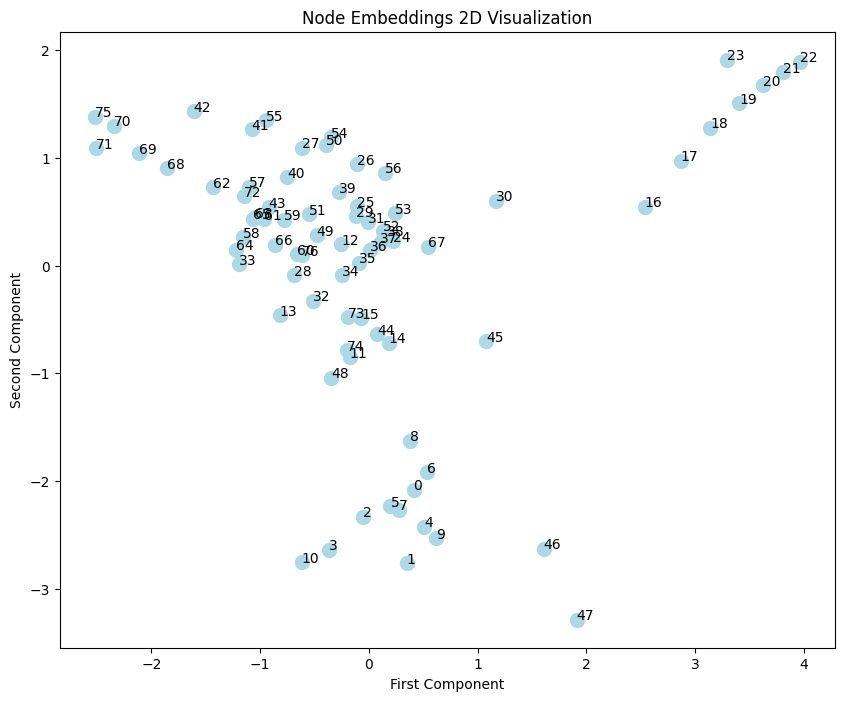

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.utils import negative_sampling
from torch_geometric.transforms import RandomLinkSplit
import pandas as pd

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

2
class GCN(torch.nn.Module):
    """Graph Convolutional Network cho Link Prediction"""
    def __init__(self, num_features, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        
    def encode(self, x, edge_index):
        # Hai lớp GCN với ReLU
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index)
        return x
    
    def decode(self, z, edge_label_index):
        # Dự đoán liên kết bằng inner product
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)
    
    def decode_all(self, z):
        # Dự đoán tất cả các liên kết có thể
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()

class LinkPredictionGNN:
    def __init__(self, dataset='karate'):
        """
        Khởi tạo với dataset được chọn
        
        Parameters:
            dataset (str): Tên dataset ('karate', 'les', 'facebook')
        """
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Load dataset
        if dataset == 'karate':
            self.G = nx.karate_club_graph()
        elif dataset == 'les':
            self.G = nx.les_miserables_graph()
        elif dataset == 'facebook':
            # Load Facebook dataset nếu có
            self.G = nx.read_edgelist('facebook_combined.txt')
        else:
            raise ValueError("Dataset không hợp lệ")
            
        self.prepare_data()
        
    def prepare_data(self):
        """Chuyển đổi NetworkX graph sang PyTorch Geometric format"""
        # Tạo mapping từ node labels sang indices
        self.node_mapping = {node: idx for idx, node in enumerate(self.G.nodes())}
        
        # Tạo node features (sử dụng one-hot encoding cho đơn giản)
        num_nodes = self.G.number_of_nodes()
        x = torch.eye(num_nodes, dtype=torch.float)
        
        # Chuyển đổi edges sang tensor format với node indices
        edge_list = [(self.node_mapping[u], self.node_mapping[v]) for u, v in self.G.edges()]
        edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
        
        # Tạo PyTorch Geometric Data object
        self.data = Data(x=x, edge_index=edge_index)
        
        # Chia dataset
        transform = RandomLinkSplit(
            num_val=0.1,
            num_test=0.2,
            is_undirected=True,
            add_negative_train_samples=True
        )
        self.train_data, self.val_data, self.test_data = transform(self.data)
        
    def train_model(self):
        """Huấn luyện GNN model"""
        self.model = GCN(
            num_features=self.data.num_nodes,
            hidden_channels=64
        ).to(self.device)
        
        optimizer = torch.optim.Adam(params=self.model.parameters(), lr=0.01)
        criterion = torch.nn.BCEWithLogitsLoss()
        
        best_val_auc = 0
        patience = 20
        counter = 0
        
        print("\nBắt đầu huấn luyện mô hình...")
        for epoch in range(1, 201):
            # Training
            self.model.train()
            optimizer.zero_grad()
            
            z = self.model.encode(
                self.train_data.x.to(self.device),
                self.train_data.edge_index.to(self.device)
            )
            
            # Lấy dự đoán cho các cạnh train
            link_logits = self.model.decode(
                z, self.train_data.edge_label_index.to(self.device)
            )
            link_labels = self.train_data.edge_label.to(self.device)
            
            loss = criterion(link_logits, link_labels)
            loss.backward()
            optimizer.step()
            
            # Validation
            self.model.eval()
            with torch.no_grad():
                z = self.model.encode(
                    self.val_data.x.to(self.device),
                    self.val_data.edge_index.to(self.device)
                )
                link_logits = self.model.decode(
                    z, self.val_data.edge_label_index.to(self.device)
                )
                link_probs = link_logits.sigmoid()
                
                # Tính validation AUC
                val_auc = roc_auc_score(
                    self.val_data.edge_label.cpu(),
                    link_probs.cpu()
                )
            
            # Early stopping
            if val_auc > best_val_auc:
                best_val_auc = val_auc
                counter = 0
            else:
                counter += 1
                
            if counter >= patience:
                print(f'Early stopping at epoch {epoch}')
                break
                
            if epoch % 10 == 0:
                print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val AUC: {val_auc:.4f}')
                
    def evaluate(self):
        """Đánh giá model trên tập test"""
        self.model.eval()
        
        with torch.no_grad():
            z = self.model.encode(
                self.test_data.x.to(self.device),
                self.test_data.edge_index.to(self.device)
            )
            link_logits = self.model.decode(
                z, self.test_data.edge_label_index.to(self.device)
            )
            link_probs = link_logits.sigmoid()
            
        # Tính các metrics
        link_labels = self.test_data.edge_label.cpu().numpy()
        link_probs = link_probs.cpu().numpy()
        link_pred = (link_probs > 0.5).astype(np.int64)
        
        test_auc = roc_auc_score(link_labels, link_probs)
        test_precision = precision_score(link_labels, link_pred)
        test_recall = recall_score(link_labels, link_pred)
        test_f1 = f1_score(link_labels, link_pred)
        
        results = {
            'Method': 'GNN (GCN)',
            'AUC': test_auc,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1-score': test_f1
        }
        
        # Hiển thị kết quả
        print("\nKết quả đánh giá trên tập test:")
        for metric, value in results.items():
            if metric == 'Method':
                print(f"{metric}: {value}")  # Không định dạng cho string
            else:
                print(f"{metric}: {value:.4f}")  # Định dạng số thập phân
                
        return results
    
    def visualize_embeddings(self):
        """Trực quan hóa node embeddings học được"""
        self.model.eval()
        
        with torch.no_grad():
            z = self.model.encode(
                self.data.x.to(self.device),
                self.data.edge_index.to(self.device)
            )
            z = z.cpu().numpy()
            
        # Sử dụng PCA để giảm chiều xuống 2D
        from sklearn.decomposition import PCA
        z_2d = PCA(n_components=2).fit_transform(z)
        
        plt.figure(figsize=(10, 8))
        plt.scatter(z_2d[:, 0], z_2d[:, 1], c='lightblue', s=100)
        
        # Thêm labels cho nodes
        for i in range(len(z_2d)):
            plt.annotate(str(i), (z_2d[i, 0], z_2d[i, 1]))
            
        plt.title('Node Embeddings 2D Visualization')
        plt.xlabel('First Component')
        plt.ylabel('Second Component')
        plt.show()
        
    def run_experiment(self):
        """Chạy toàn bộ thử nghiệm"""
        print(f"\nSử dụng device: {self.device}")
        print(f"Số nodes: {self.G.number_of_nodes()}")
        print(f"Số edges: {self.G.number_of_edges()}")
        
        self.train_model()
        results = self.evaluate()
        self.visualize_embeddings()
        
        return results

if __name__ == "__main__":
    print("Chọn dataset:")
    print("1. Zachary's Karate Club")
    print("2. Les Miserables Network")
    print("3. Facebook Network")
    
    choice = input("Nhập lựa chọn (1-3): ")
    datasets = {'1': 'karate', '2': 'les', '3': 'facebook'}
    
    if choice in datasets:
        # Đảm bảo các package cần thiết đã được cài đặt
        try:
            import torch_geometric
        except ImportError:
            print("Vui lòng cài đặt torch_geometric bằng lệnh:")
            print("pip install torch-geometric")
            exit(1)
            
        lp = LinkPredictionGNN(dataset=datasets[choice])
        results = lp.run_experiment()
    else:
        print("Lựa chọn không hợp lệ!")
